# Women Financial Inclusion

In [ ]:
# !pip install kmodes

In [ ]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from kmodes.kmodes import KModes
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
# Save the file
# ph_has_account.to_csv("ph_has_account.csv", index=False)
# ph_data.to_csv("ph_data_1.csv", index=False)
ph_data = pd.read_csv("/content/ph_data_1.csv")
ph_data.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,has_account
0,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,175160143,0.177654,2,34.0,3,5,...,4,4,4.0,1,5.0,1,1,1,1.0,1
1,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,196715468,0.318118,1,25.0,3,4,...,4,4,4.0,2,4.0,1,1,1,0.0,1
2,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,137538586,0.422107,1,26.0,2,5,...,4,4,4.0,4,3.0,1,2,1,1.0,1
3,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,132202737,1.299141,1,23.0,3,5,...,4,4,4.0,4,1.0,1,1,1,1.0,1
4,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,139964446,1.165876,1,33.0,2,3,...,4,4,4.0,2,5.0,1,1,0,0.0,0


In [ ]:
ph_data=ph_data[ph_data["female"]==1]
ph_data["female"].value_counts()

1    573
Name: female, dtype: int64

In [ ]:
filtered_data = ph_data[['economy', 'economycode', 'regionwb','wpid_random','female','age','educ','inc_q','account_mob','account_fin','has_account',
         'fin11a','fin13_1a',
         'fin11b','fin13_1b',
         'fin11c','fin13_1c',
         'fin11f','fin13_1d',
         'fin11d','fin11e','fin11g','fin11h','fin13_1e','fin13_1f']]

In [ ]:
filtered_data = filtered_data.rename(columns={"female": "Gender"})

In [ ]:
def replace_age_category(row=None):
    age_category = None
    
    if row['age'] <=30:
        age_category = 'Youth (15-30)'
    elif row['age'] >=31 and row['age']<= 59:
        age_category = 'Adult (31-59)'
    elif row['age'] >=60:
        age_category = 'Senior Citizen (60+)'
    row['Age_Profile'] = age_category
    
    return row

In [ ]:
filtered_data_age = filtered_data.apply(lambda x: replace_age_category(x), axis=1)
filtered_data_age

,economy,economycode,regionwb,wpid_random,Gender,age,educ,inc_q,account_mob,account_fin,...,fin13_1c,fin11f,fin13_1d,fin11d,fin11e,fin11g,fin11h,fin13_1e,fin13_1f,Age_Profile
1,Philippines,PHL,East Asia & Pacific (excluding high income),196715468,1,25.0,3,4,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youth (15-30)
2,Philippines,PHL,East Asia & Pacific (excluding high income),137538586,1,26.0,2,5,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youth (15-30)
3,Philippines,PHL,East Asia & Pacific (excluding high income),132202737,1,23.0,3,5,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youth (15-30)
4,Philippines,PHL,East Asia & Pacific (excluding high income),139964446,1,33.0,2,3,0.0,0,...,NaN,1.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,Adult (31-59)
6,Philippines,PHL,East Asia & Pacific (excluding high income),138015957,1,19.0,2,2,0.0,0,...,NaN,1.0,NaN,2.0,2.0,1.0,2.0,NaN,NaN,Youth (15-30)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,Philippines,PHL,East Asia & Pacific (excluding high income),145656201,1,32.0,1,4,1.0,0,...,NaN,1.0,NaN,2.0,1.0,2.0,2.0,NaN,NaN,Adult (31-59)
993,Philippines,PHL,East Asia & Pacific (excluding high income),188439587,1,15.0,1,3,0.0,0,...,NaN,1.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,Youth (15-30)
994,Philippines,PHL,East Asia & Pacific (excluding high income),201040209,1,19.0,2,3,0.0,0,...,NaN,1.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,Youth (15-30)
996,Philippines,PHL,East Asia & Pacific (excluding high income),169989028,1,25.0,2,3,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youth (15-30)


In [ ]:
grouped_data = filtered_data_age.groupby(['Gender', 'Age_Profile']).agg(
        total_has_account=('has_account','sum'),
        total_popu=('has_account', 'count')
).reset_index()

In [ ]:
grouped_data['% Financial Inclusion'] = grouped_data['total_has_account']/grouped_data['total_popu']*100

In [ ]:
grouped_data

,Gender,Age_Profile,total_has_account,total_popu,% Financial Inclusion
0,1,Adult (31-59),159,249,63.855422
1,1,Senior Citizen (60+),11,17,64.705882
2,1,Youth (15-30),171,307,55.700326


In [ ]:
grouped_data["Classification"] = grouped_data['Gender'].astype(str)+ grouped_data["Age_Profile"]
grouped_data = grouped_data[['Classification','Age_Profile','Gender','total_has_account','total_popu','% Financial Inclusion']]
grouped_data = grouped_data.sort_values(['Age_Profile'])

grouped_data

,Classification,Age_Profile,Gender,total_has_account,total_popu,% Financial Inclusion
0,1Adult (31-59),Adult (31-59),1,159,249,63.855422
1,1Senior Citizen (60+),Senior Citizen (60+),1,11,17,64.705882
2,1Youth (15-30),Youth (15-30),1,171,307,55.700326


In [ ]:
Classification_fix = {
'1Youth (15-30)' : 'Female Youth',
'2Youth (15-30)' : 'Male Adult',   
'1Adult (31-59)' : 'Female Adult',  
'2Adult (31-59)' : 'Male Adult',  
'1Senior Citizen (60+)' : 'Female Senior Citzen',
'2Senior Citizen (60+)' : 'Male Senior Citizen',      
}

grouped_data = grouped_data.replace({'Classification':Classification_fix})
grouped_data

,Classification,Age_Profile,Gender,total_has_account,total_popu,% Financial Inclusion
0,Female Adult,Adult (31-59),1,159,249,63.855422
1,Female Senior Citzen,Senior Citizen (60+),1,11,17,64.705882
2,Female Youth,Youth (15-30),1,171,307,55.700326


In [ ]:
def sort_classification(row=None):
    sort_classification = None
    
    if row['Age_Profile'] == 'Youth (15-30)':
        sort_classification = '1'
    elif row['Age_Profile'] == 'Adult (31-59)':
        sort_classification = '2'
    elif row['Age_Profile'] == 'Senior Citizen (60+)':
        sort_classification = '3'
    row['sort_classification'] = sort_classification
    
    return row

In [ ]:
grouped_data= grouped_data.apply(lambda x: sort_classification(x), axis=1)

In [ ]:
grouped_data = grouped_data.sort_values('sort_classification', ascending=[True])
Gender_Mapping = {1:'Female',2:'Male'}

grouped_data = grouped_data.replace({'Gender':Gender_Mapping})

grouped_data

,Classification,Age_Profile,Gender,total_has_account,total_popu,% Financial Inclusion,sort_classification
2,Female Youth,Youth (15-30),Female,171,307,55.700326,1
0,Female Adult,Adult (31-59),Female,159,249,63.855422,2
1,Female Senior Citzen,Senior Citizen (60+),Female,11,17,64.705882,3


In [ ]:
# sns.set(style="whitegrid")

# plt.figure(figsize=(13, 8))
# ax=sns.barplot(x='Age_Profile', y='% Financial Inclusion', hue='Gender', data=grouped_data, palette=['#e74c3c', '#3498db'])
# plt.title('Percentage of Male and Female with Accounts by Age Profile', fontsize=16)
# plt.xlabel('Age Profile', fontsize=14)
# plt.ylabel('% Financial Inclusion', fontsize=14)
# plt.legend(title=None, loc='best')

# # Add value labels to the bars
# for container in ax.containers:
#     for patch in container.patches:
#         ax.annotate('{:.2f}%'.format(patch.get_height()), 
#                     xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()), 
#                     xytext=(0, 3), 
#                     textcoords='offset points', 
#                     ha='center', 
#                     va='bottom', 
#                     fontsize=10)

# # Show plot
# plt.show()

In [ ]:
# grouped_data_pivot = grouped_data.pivot(index=['Age_Profile', 'sort_classification'], columns='Gender', values='% Financial Inclusion').reset_index()
# grouped_data_pivot['Percent Gender Gap'] = grouped_data_pivot['Female'] - grouped_data_pivot['Male']
# grouped_data_pivot.sort_values(['sort_classification'])

In [ ]:
# sns.set(style="whitegrid")
# palette = sns.color_palette(["#e74c3c","#e74c3c","#2ecc71"])

# plt.figure(figsize=(13, 8))
# ax=sns.barplot(x='Age_Profile', y='Percent Gender Gap', order = grouped_data_pivot.sort_values('sort_classification',ascending = True).Age_Profile, data=grouped_data_pivot, palette=palette)
# plt.title('Percentage Gap of Male and Female with Accounts by Age Profile', fontsize=16)
# plt.xlabel('Age Profile', fontsize=14)
# plt.ylabel('% Gap', fontsize=14)

# # Add value labels to the bars
# for p in ax.patches:
#     ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# # Show plot
# plt.show()

In [ ]:
# plt.figure(figsize=(6,3)  , dpi=200)

# # Run bar plot
# sns.lineplot(
#     grouped_data['Generation'],
#     grouped_data['% Financial Inclusion'],
#     hue = grouped_data['Gender'],
#     palette = ['red','blue'],
#     data = grouped_data
# )

# # Set title
# plt.title('Male vs Female Financial Inclusion per Generation')

# # Set labels
# plt.xlabel('Generation')
# plt.ylabel('% Financial Inclusion')


# # Show figure
# plt.show()

In [ ]:
filtered_data_cluster = ph_data[['female','inc_q','age','educ','account_mob','account_fin']]
filtered_data_cluster['age'].isna().sum()

0

In [ ]:
# age has 1 null value -- dropping it
filtered_data_cluster =filtered_data_cluster.dropna()

In [ ]:
filtered_data_cluster.isna().sum()

female         0
inc_q          0
age            0
educ           0
account_mob    0
account_fin    0
dtype: int64

In [ ]:
def replace_age_profile_cluster(row=None):
    age_category = None
    
    if row['age'] <=30:
        age_category = 'Youth (15-30)'
    elif row['age'] >=31 and row['age']<= 59:
        age_category = 'Adult (31-59)'
    elif row['age'] >=60:
        age_category = 'Senior Citizen (60+)'
    row['Age_Profile'] = age_category
    
    return row

In [ ]:
filtered_data_cluster = filtered_data_cluster.apply(lambda x: replace_age_profile_cluster(x), axis=1)
filtered_data_cluster.head()

In [ ]:
filtered_data_cluster =filtered_data_cluster[['female','inc_q','Age_Profile','educ','account_fin','account_mob']]
filtered_data_cluster.head(2)

,female,inc_q,Age_Profile,educ,account_fin,account_mob
1,1.0,4.0,Youth (15-30),3.0,1.0,0.0
2,1.0,5.0,Youth (15-30),2.0,1.0,0.0


In [ ]:
gender_group_mapping = {
    1: 'Female',
    2: 'Male'
}

income_group_mapping = {
    1:'poorest 20%',
    2:'second 20%',
    3:'middle 20%',
    4:'fourth 20%',
    5:'richest 20%'
}

Age_group_mapping = {
    1:'Youth (15-30)',
    2:'Adult (31-59)',
    3:'Senior Citizen (60+)'
}

educational_group_mapping = {
    1: 'completed primary or less',
    2: 'secondary',
    3: 'completed tertiary or more'
}


fin_ownership_mapping = {
    1: 'yes',
    2: 'no',
    3: 'no',
    4: 'no',
    0: 'no'
}

mob_ownership_mapping = {
    1: 'yes',
    2: 'no',
    3: 'no',
    4: 'no',
    0: 'no'
}

In [ ]:
filtered_data_cluster = filtered_data_cluster.replace(
    {
        'female': gender_group_mapping,
        'inc_q': income_group_mapping,
        'Age_Profile':Age_group_mapping,
        'educ': educational_group_mapping,
        'account_fin': fin_ownership_mapping,
        'account_mob': mob_ownership_mapping
     }
    )

filtered_data_cluster['Age_Profile'].value_counts()

Youth (15-30)           307
Adult (31-59)           249
Senior Citizen (60+)     17
Name: Age_Profile, dtype: int64

In [ ]:
filtered_data_cluster.isna().sum()

female         0
inc_q          0
Age_Profile    0
educ           0
account_fin    0
account_mob    0
dtype: int64

In [ ]:
# Create clustering function
def run_kmodes(n_clusters=None, filtered_data_cluster=None):
  # Initialize clustering
  kmodes = KModes(
      init="random",
      n_clusters=n_clusters,
      random_state=42
      )
  
  # Apply clustering to the data
  kmodes.fit(filtered_data_cluster)

  # Print intertia
  print(f"Cost for n_clusters = {n_clusters}: {kmodes.cost_}")

  return kmodes.cost_, kmodes.labels_

In [ ]:
cost_values = []

In [ ]:
for k in range(1, 11):
  # Run our function
  cost, labels = run_kmodes(
    n_clusters=k,
    filtered_data_cluster=filtered_data_cluster
  )

  # Save cost to our container
  cost_values.append(cost)

Cost for n_clusters = 1: 1361.0
Cost for n_clusters = 2: 993.0
Cost for n_clusters = 3: 819.0
Cost for n_clusters = 4: 746.0
Cost for n_clusters = 5: 664.0
Cost for n_clusters = 6: 623.0
Cost for n_clusters = 7: 577.0
Cost for n_clusters = 8: 556.0
Cost for n_clusters = 9: 528.0
Cost for n_clusters = 10: 502.0


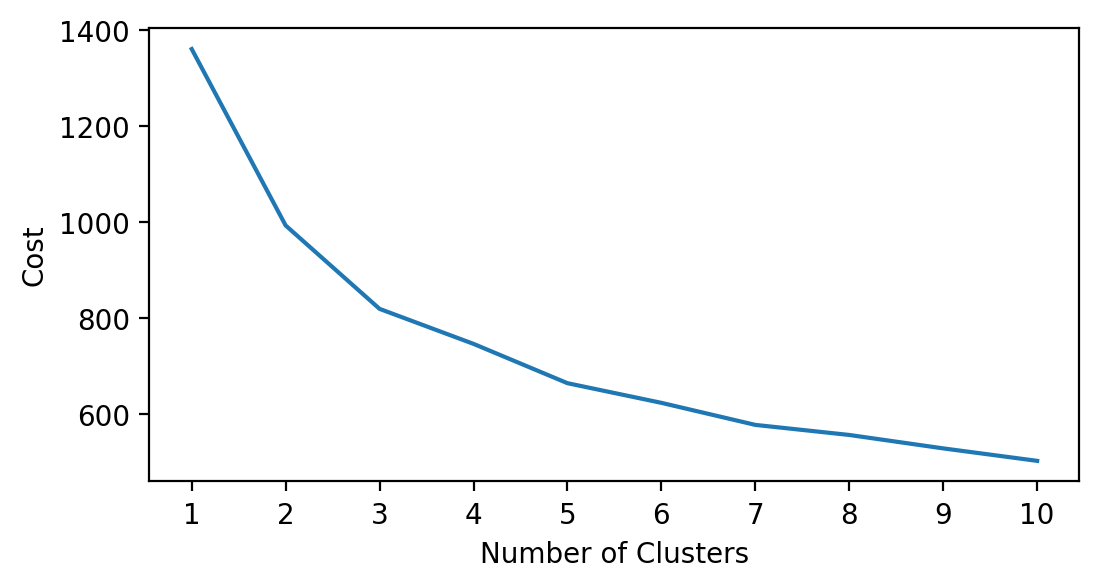

In [ ]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Plot inertia vs number of clusters
plt.plot(range(1, 11), cost_values)

# Format plot
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

# Show plot
plt.show()

In [ ]:
# Run our K-Modes function for n_clusters=5
cost, labels = run_kmodes(
  n_clusters=5,
  filtered_data_cluster=filtered_data_cluster
)

Cost for n_clusters = 5: 664.0


In [ ]:
# 5 clusters
filtered_data_cluster['labels']= labels
filtered_data_cluster

,female,inc_q,Age_Profile,educ,account_fin,account_mob,labels
1,Female,fourth 20%,Youth (15-30),completed tertiary or more,yes,no,0
2,Female,richest 20%,Youth (15-30),secondary,yes,no,0
3,Female,richest 20%,Youth (15-30),completed tertiary or more,yes,yes,2
4,Female,middle 20%,Adult (31-59),secondary,no,no,1
6,Female,second 20%,Youth (15-30),secondary,no,no,4
...,...,...,...,...,...,...,...
992,Female,fourth 20%,Adult (31-59),completed primary or less,no,yes,1
993,Female,middle 20%,Youth (15-30),completed primary or less,no,no,4
994,Female,middle 20%,Youth (15-30),secondary,no,no,4
996,Female,middle 20%,Youth (15-30),secondary,yes,yes,0


In [ ]:
filtered_data_cluster['labels'].value_counts()

0    173
1    131
4    122
2    102
3     45
Name: labels, dtype: int64

In [ ]:
# 5 labels
filtered_data_cluster.groupby('labels').agg(pd.Series.mode)

,female,inc_q,Age_Profile,educ,account_fin,account_mob
labels,,,,,,
0,Female,fourth 20%,Youth (15-30),secondary,yes,no
1,Female,middle 20%,Adult (31-59),secondary,no,no
2,Female,richest 20%,Youth (15-30),completed tertiary or more,yes,yes
3,Female,richest 20%,Adult (31-59),completed tertiary or more,yes,no
4,Female,middle 20%,Youth (15-30),secondary,no,no


In [ ]:
# # 5 clusters
# filtered_data_cluster['labels']= labels
# filtered_data_cluster

In [ ]:
# filtered_data_cluster['labels'].value_counts()

In [ ]:
# # 5 labels
# filtered_data_cluster.groupby('labels').agg(pd.Series.mode)

In [ ]:
# # 7 clusters
# filtered_data_cluster['labels']= labels
# filtered_data_cluster

In [ ]:
# filtered_data_cluster['labels'].value_counts()

In [ ]:
# # 7 labels
# filtered_data_cluster.groupby('labels').agg(pd.Series.mode)